In [2]:

import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%pip install requests
import requests


###doc = https://api1-ratings.food.gov.uk/open-data-resources/documents/api-guidance.pdf


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\straf\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [3]:
pd.set_option('display.max_columns', None)

# Display all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
###url search params
lang ="en-GB"
name = "^" # ^ = all
address = "^" ## includes post codes
sortOrder = "Rating"
businessType = "0"
la = "200" # local authority code  https://api1-ratings.food.gov.uk//authorities/xml
page = "1" # the page to return
pageSize = "2000" # number to return on a page
dataFormat = "json" ## xml also an option

###sort order details
# • Alpha
# Returns the results in the order
# of Business Name in ascending
# order.
# • Desc_Alpha
# Returns the results in the order
# of Business Name in
# descending order
# • Type
# Returns the results in the order
# of Business Type in ascending
# order.
# • Desc_Type
# Returns the results in the order
# of Business Type in descending
# order.
# • Rating
# Returns the results in the order
# of Rating in ascending order
# (5,4,3,2,1,0,Pass, Pass and
# Eatsafe, Improvement Required,
# Awaiting Publication, Exempt,
# Awaiting Inspection)
# • Desc_Rating
# Returns the results in the order
# of Rating in descending order
# (0,1,2,3,4,5, Improvement
# Required, Pass, Pass and
# Eatsafe, Awaiting Publication,
# Exempt, Awaiting Inspection

In [5]:
response = requests.get("https://api1-ratings.food.gov.uk/enhanced-search/"+lang+"/"+name+"/"+address+"/"+sortOrder+"/"+businessType+"/"+la+"/"+page+"/"+pageSize+"/"+dataFormat)

In [6]:
data = response.json()
data

{'?xml': {'@version': '1.0'},
 'FHRSEstablishment': {'Header': {'#text': '',
   'ExtractDate': '2024-10-24',
   'ItemCount': '1148',
   'ReturnCode': 'Success',
   'PageNumber': '1',
   'PageSize': '2000',
   'PageCount': '1'},
  'EstablishmentCollection': {'@xmlns:xsd': 'http://www.w3.org/2001/XMLSchema',
   '@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
   'EstablishmentDetail': [{'FHRSID': '124500',
     'LocalAuthorityBusinessID': '5302',
     'BusinessName': 'Abbeyfield Silverdale Society',
     'BusinessType': 'Caring Premises',
     'BusinessTypeID': '5',
     'AddressLine1': 'Cove House',
     'AddressLine2': 'Cove Road',
     'AddressLine3': 'Silverdale',
     'AddressLine4': 'Carnforth',
     'PostCode': 'LA5 0SG',
     'RatingValue': '5',
     'RatingKey': 'fhrs_5_en-gb',
     'RightToReply': None,
     'RatingDate': '21 July 2023',
     'LocalAuthorityCode': '200',
     'LocalAuthorityName': 'Lancaster City',
     'LocalAuthorityWebSite': 'http://www.lancaster.g

In [7]:
lancasterEstablishments = data["FHRSEstablishment"]["EstablishmentCollection"]["EstablishmentDetail"]
lancasterEstablishments = pd.DataFrame(lancasterEstablishments)

In [8]:
lancasterEstablishments.head(100)

FHRSID LocalAuthorityBusinessID   
0    124500                     5302  \
1   1077047                    60718   
2    116624                     4581   
3    124732                     5318   
4    711641                    53743   
5   1372146                    66925   
6   1677156                    74042   
7    711639                    53731   
8    102988                    34406   
9     81153                    19777   
10  1280755                     4515   
11   855772                    56235   
12  1689230                    74278   
13   116182                    45359   
14  1661387                    73694   
15   855773                    56250   
16  1007886                    59066   
17  1050959                     2837   
18  1050961                     2839   
19  1048378                    59807   
20  1469861                    66823   
21   118425                    47759   
22  1665411                    73797   
23  1438728                    69547   
24   717438                    53820   
25  1520467                    70553   
26   438581                    49797   
27   587398                    51815   
28   122217                     5080   
29  1653719                     1407   
30   124592                     5310   
31   130283                      614   
32   427078                     5861   
33  1742487                    74542   
34   118533                    47886   
35   196091                    48671   
36   103722                     3499   
37  1641039                    73140   
38    89533                     2399   
39   144754                     8415   
40  1661389                    73731   
41   142898                     7997   
42   521020                    50750   
43   344790                    42636   
44  1625534                    72763   
45  1316723                    66162   
46   427070                     2683   
47  1758563                    75847   
48    93549                     2693   
49   862565                    56323   
50   124085                     5258   
51   126593                     5568   
52  1560698                     4158   
53  1381321                    34190   
54   105671                    36397   
55    89622                     2401   
56  1493978                    70076   
57  1513427                    70313   
58  1269393                    64579   
59  1316717                    66024   
60    93452                     2685   
61   117412                    46655   
62    94168                     2736   
63  1742485                    35109   
64   101073                    32846   
65    95250                    28247   
66   847885                    50886   
67    91130                     2504   
68  1409869                    68680   
69   292191                    49071   
70  1438725                    66602   
71   114235                     4324   
72   125895                     5453   
73  1269385                    61431   
74  1316718                    66103   
75   113550                    42586   
76  1150233                    61901   
77    62238                    13733   
78   116697                    45910   
79   110400                     4009   
80  1675188                    72669   
81   359675                    49243   
82  1429605                    24524   
83   122241                     5082   
84  1556931                    13121   
85    82330                     2002   
86   108314                     3861   
87   116928                     4614   
88  1753487                    75646   
89   102228                    33822   
90    43802                    10654   
91   104280                     3548   
92  1500155                    70239   
93  1697815                    74456   
94   136433                     7074   
95   447250                    49908   
96   112830                    41983   
97   102704                    34195   
98  1363550                    66753   
99  1

In [9]:
ratingsdf = pd.json_normalize(lancasterEstablishments["Scores"])

In [10]:
lancasterEstablishments = pd.concat([lancasterEstablishments.drop(columns = ["Scores"]),ratingsdf], axis = 1)
lancasterEstablishments

FHRSID LocalAuthorityBusinessID   
0      124500                     5302  \
1     1077047                    60718   
2      116624                     4581   
3      124732                     5318   
4      711641                    53743   
5     1372146                    66925   
6     1677156                    74042   
7      711639                    53731   
8      102988                    34406   
9       81153                    19777   
10    1280755                     4515   
11     855772                    56235   
12    1689230                    74278   
13     116182                    45359   
14    1661387                    73694   
15     855773                    56250   
16    1007886                    59066   
17    1050959                     2837   
18    1050961                     2839   
19    1048378                    59807   
20    1469861                    66823   
21     118425                    47759   
22    1665411                    73797   
23    1438728                    69547   
24     717438                    53820   
25    1520467                    70553   
26     438581                    49797   
27     587398                    51815   
28     122217                     5080   
29    1653719                     1407   
30     124592                     5310   
31     130283                      614   
32     427078                     5861   
33    1742487                    74542   
34     118533                    47886   
35     196091                    48671   
36     103722                     3499   
37    1641039                    73140   
38      89533                     2399   
39     144754                     8415   
40    1661389                    73731   
41     142898                     7997   
42     521020                    50750   
43     344790                    42636   
44    1625534                    72763   
45    1316723                    66162   
46     427070                     2683   
47    1758563                    75847   
48      93549                     2693   
49     862565                    56323   
50     124085                     5258   
51     126593                     5568   
52    1560698                     4158   
53    1381321                    34190   
54     105671                    36397   
55      89622                     2401   
56    1493978                    70076   
57    1513427                    70313   
58    1269393                    64579   
59    1316717                    66024   
60      93452                     2685   
61     117412                    46655   
62      94168                     2736   
63    1742485                    35109   
64     101073                    32846   
65      95250                    28247   
66     847885                    50886   
67      91130                     2504   
68    1409869                    68680   
69     292191                    49071   
70    1438725                    66602   
71     114235                     4324   
72     125895                     5453   
73    1269385                    61431   
74    1316718                    66103   
75     113550                    42586   
76    1150233                    61901   
77      62238                    13733   
78     116697                    45910   
79     110400                     4009   
80    1675188                    72669   
81     359675                    49243   
82    1429605                    24524   
83     122241                     5082   
84    1556931                    13121   
85      82330                     2002   
86     108314                     3861   
87     116928                     4614   
88    1753487                    75646   
89     102228                    33822   
90      43802                    10654   
91     104280                     3548   
92    1500155                    70239   
93    1697815                    74456   
94     136433    

In [11]:
lancasterEstablishments =lancasterEstablishments.drop(columns = ["Hygiene.@xsi:nil","Structural.@xsi:nil","ConfidenceInManagement.@xsi:nil"])

In [12]:
GeoCoords = pd.json_normalize(lancasterEstablishments["Geocode"])

In [13]:
GeoCoords = GeoCoords.drop(columns = ["Longitude.@xsi:nil","Latitude.@xsi:nil"])
lancasterEstablishments = pd.concat([lancasterEstablishments.drop(columns = ["Geocode"]),GeoCoords], axis = 1)

In [14]:
lancasterEstablishments

FHRSID LocalAuthorityBusinessID   
0      124500                     5302  \
1     1077047                    60718   
2      116624                     4581   
3      124732                     5318   
4      711641                    53743   
5     1372146                    66925   
6     1677156                    74042   
7      711639                    53731   
8      102988                    34406   
9       81153                    19777   
10    1280755                     4515   
11     855772                    56235   
12    1689230                    74278   
13     116182                    45359   
14    1661387                    73694   
15     855773                    56250   
16    1007886                    59066   
17    1050959                     2837   
18    1050961                     2839   
19    1048378                    59807   
20    1469861                    66823   
21     118425                    47759   
22    1665411                    73797   
23    1438728                    69547   
24     717438                    53820   
25    1520467                    70553   
26     438581                    49797   
27     587398                    51815   
28     122217                     5080   
29    1653719                     1407   
30     124592                     5310   
31     130283                      614   
32     427078                     5861   
33    1742487                    74542   
34     118533                    47886   
35     196091                    48671   
36     103722                     3499   
37    1641039                    73140   
38      89533                     2399   
39     144754                     8415   
40    1661389                    73731   
41     142898                     7997   
42     521020                    50750   
43     344790                    42636   
44    1625534                    72763   
45    1316723                    66162   
46     427070                     2683   
47    1758563                    75847   
48      93549                     2693   
49     862565                    56323   
50     124085                     5258   
51     126593                     5568   
52    1560698                     4158   
53    1381321                    34190   
54     105671                    36397   
55      89622                     2401   
56    1493978                    70076   
57    1513427                    70313   
58    1269393                    64579   
59    1316717                    66024   
60      93452                     2685   
61     117412                    46655   
62      94168                     2736   
63    1742485                    35109   
64     101073                    32846   
65      95250                    28247   
66     847885                    50886   
67      91130                     2504   
68    1409869                    68680   
69     292191                    49071   
70    1438725                    66602   
71     114235                     4324   
72     125895                     5453   
73    1269385                    61431   
74    1316718                    66103   
75     113550                    42586   
76    1150233                    61901   
77      62238                    13733   
78     116697                    45910   
79     110400                     4009   
80    1675188                    72669   
81     359675                    49243   
82    1429605                    24524   
83     122241                     5082   
84    1556931                    13121   
85      82330                     2002   
86     108314                     3861   
87     116928                     4614   
88    1753487                    75646   
89     102228                    33822   
90      43802                    10654   
91     104280                     3548   
92    1500155                    70239   
93    1697815                    74456   
94     136433    

In [15]:
lancasterCenterLatitude = 54.0487698785643
lancasterCenterLongitude= -2.799862863486408

In [16]:
lancasterEstablishments['Longitude'] = pd.to_numeric(lancasterEstablishments['Longitude'], errors='coerce')
lancasterEstablishments['Hygiene'] = pd.to_numeric(lancasterEstablishments['Hygiene'], errors='coerce')
lancasterEstablishments['Structural'] = pd.to_numeric(lancasterEstablishments['Structural'], errors='coerce')
lancasterEstablishments['ConfidenceInManagement'] = pd.to_numeric(lancasterEstablishments['ConfidenceInManagement'], errors='coerce')
# Convert Latitude to float
lancasterEstablishments['Latitude'] = pd.to_numeric(lancasterEstablishments['Latitude'], errors='coerce')
establishmentsNonNan = lancasterEstablishments[(lancasterEstablishments["Longitude"].notna()) &  (lancasterEstablishments["Latitude"].notna())]

In [17]:
establishmentsNonNan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 0 to 1147
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FHRSID                      958 non-null    object 
 1   LocalAuthorityBusinessID    958 non-null    object 
 2   BusinessName                958 non-null    object 
 3   BusinessType                958 non-null    object 
 4   BusinessTypeID              958 non-null    object 
 5   AddressLine1                450 non-null    object 
 6   AddressLine2                957 non-null    object 
 7   AddressLine3                958 non-null    object 
 8   AddressLine4                958 non-null    object 
 9   PostCode                    940 non-null    object 
 10  RatingValue                 958 non-null    object 
 11  RatingKey                   958 non-null    object 
 12  RightToReply                0 non-null      object 
 13  RatingDate                  958 non-nul

In [18]:
establishmentsNonNan["DistanceToCenter"] = np.sqrt((establishmentsNonNan["Longitude"] - lancasterCenterLongitude)**2 + (establishmentsNonNan["Latitude"] - lancasterCenterLatitude)**2)

C:\Users\straf\AppData\Local\Temp\ipykernel_26976\3202789876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  establishmentsNonNan["DistanceToCenter"] = np.sqrt((establishmentsNonNan["Longitude"] - lancasterCenterLongitude)**2 + (establishmentsNonNan["Latitude"] - lancasterCenterLatitude)**2)


In [19]:
establishmentsNonNan["TotalScore"] = establishmentsNonNan["Hygiene"]+establishmentsNonNan["Structural"]+establishmentsNonNan["ConfidenceInManagement"]
    


C:\Users\straf\AppData\Local\Temp\ipykernel_26976\1719375457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  establishmentsNonNan["TotalScore"] = establishmentsNonNan["Hygiene"]+establishmentsNonNan["Structural"]+establishmentsNonNan["ConfidenceInManagement"]


In [20]:
establishmentsNonNan

FHRSID LocalAuthorityBusinessID   
0      124500                     5302  \
1     1077047                    60718   
2      116624                     4581   
3      124732                     5318   
4      711641                    53743   
5     1372146                    66925   
6     1677156                    74042   
7      711639                    53731   
8      102988                    34406   
9       81153                    19777   
10    1280755                     4515   
13     116182                    45359   
16    1007886                    59066   
17    1050959                     2837   
18    1050961                     2839   
19    1048378                    59807   
21     118425                    47759   
24     717438                    53820   
25    1520467                    70553   
26     438581                    49797   
27     587398                    51815   
28     122217                     5080   
29    1653719                     1407   
30     124592                     5310   
31     130283                      614   
32     427078                     5861   
33    1742487                    74542   
34     118533                    47886   
35     196091                    48671   
36     103722                     3499   
38      89533                     2399   
39     144754                     8415   
40    1661389                    73731   
41     142898                     7997   
43     344790                    42636   
45    1316723                    66162   
46     427070                     2683   
48      93549                     2693   
49     862565                    56323   
50     124085                     5258   
51     126593                     5568   
52    1560698                     4158   
53    1381321                    34190   
55      89622                     2401   
57    1513427                    70313   
58    1269393                    64579   
60      93452                     2685   
61     117412                    46655   
62      94168                     2736   
63    1742485                    35109   
64     101073                    32846   
65      95250                    28247   
67      91130                     2504   
69     292191                    49071   
71     114235                     4324   
72     125895                     5453   
73    1269385                    61431   
75     113550                    42586   
77      62238                    13733   
78     116697                    45910   
79     110400                     4009   
80    1675188                    72669   
81     359675                    49243   
82    1429605                    24524   
83     122241                     5082   
84    1556931                    13121   
85      82330                     2002   
86     108314                     3861   
87     116928                     4614   
89     102228                    33822   
91     104280                     3548   
92    1500155                    70239   
93    1697815                    74456   
94     136433                     7074   
95     447250                    49908   
96     112830                    41983   
97     102704                    34195   
99    1220859                    63550   
100    113619                    42640   
101   1605807                    61380   
102    108368                     3864   
103     84884                     2113   
104    903956                    56844   
106    116244                    45416   
107    359676                    49252   
108     98671                    31120   
110    126713                     5582   
111   1732185                    75125   
112   1059349                    60115   
113    108576                    38823   
114   1224767                    63807   
115   1026938                    59453   
116   1535831                    67970   
122     98279                    30932   
123     90727    

0        5.0
1        5.0
2        5.0
3        0.0
4        5.0
5        5.0
6        5.0
7        5.0
8        0.0
9        0.0
10       5.0
13       5.0
16       5.0
17       0.0
18       5.0
19       5.0
21       5.0
24       0.0
25       0.0
26       5.0
27       5.0
28       0.0
29       5.0
30       5.0
31       0.0
32       0.0
33       5.0
34       0.0
35       5.0
36       5.0
38       0.0
39       5.0
40       5.0
41       5.0
43       0.0
45       0.0
46       0.0
48       0.0
49       5.0
50       5.0
51       5.0
52       5.0
53       5.0
55       5.0
57       0.0
58       5.0
60       5.0
61       5.0
62       0.0
63       5.0
64       5.0
65       0.0
67       5.0
69       5.0
71       0.0
72       5.0
73       5.0
75       NaN
77       5.0
78       5.0
79       5.0
80       5.0
81       0.0
82       5.0
83       0.0
84       5.0
85       5.0
86       5.0
87       0.0
89       5.0
91       0.0
92       5.0
93       5.0
94       5.0
95       5.0
96       5.0
97       0.0

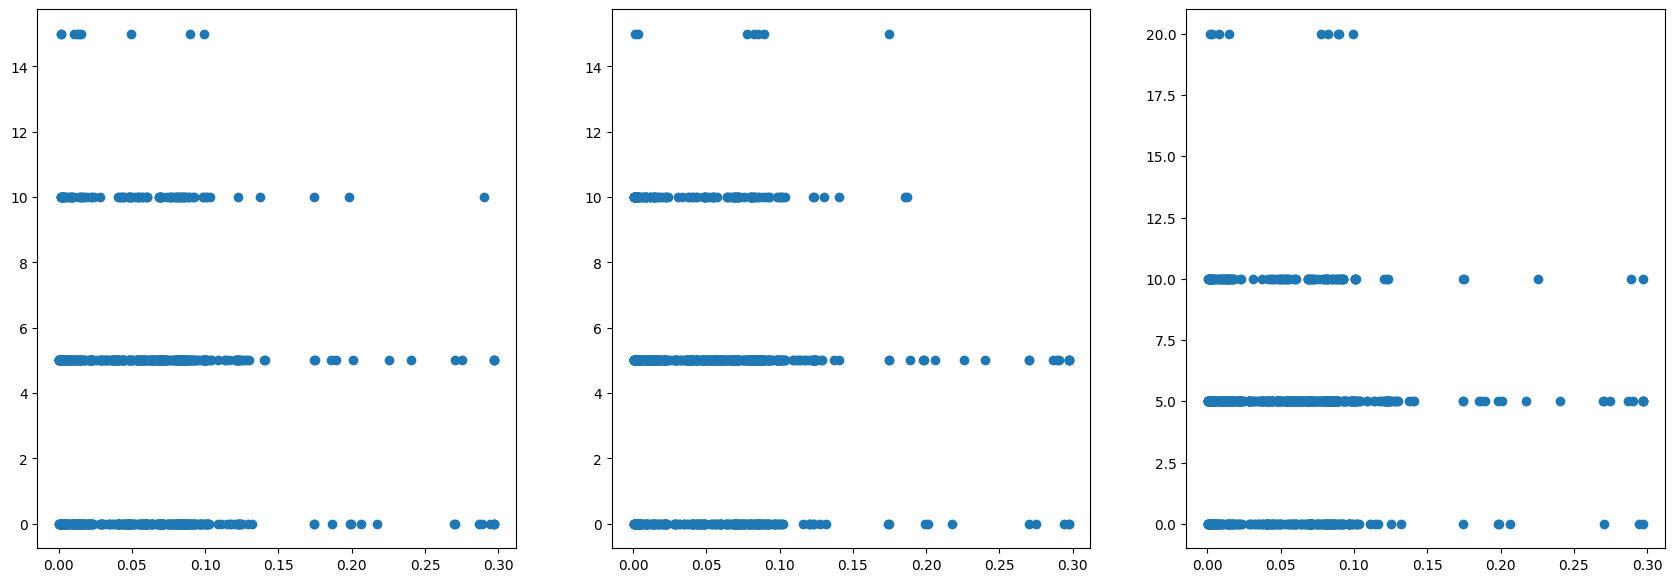

In [21]:
ScoreVsDistance, (axHygiene,axStructural,axConfidence) = plt.subplots(1,3, figsize=(21 ,7), width_ratios =[1,1,1])
axHygiene.scatter(establishmentsNonNan["DistanceToCenter"],establishmentsNonNan["Hygiene"])
axStructural.scatter(establishmentsNonNan["DistanceToCenter"],establishmentsNonNan["Structural"])#
axConfidence.scatter(establishmentsNonNan["DistanceToCenter"],establishmentsNonNan["ConfidenceInManagement"])
establishmentsNonNan["ConfidenceInManagement"]

C:\Users\straf\AppData\Local\Temp\ipykernel_26976\1290015560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  establishmentsNonNan["riskColours"] = establishmentsNonNan['TotalScore'].apply(


TotalScore  count
4          0.0     96
2          5.0    143
1         10.0    227
0         15.0    232
3         20.0    125
6         25.0     28
5         30.0     31
7         35.0      8
9         40.0      1
8         45.0      3
10        50.0      1

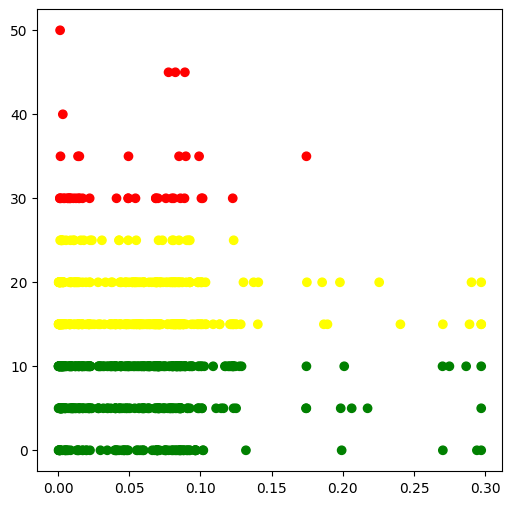

In [22]:
establishmentsNonNan["riskColours"] = establishmentsNonNan['TotalScore'].apply(
    lambda score: 'red' if score >= 30 else ('yellow' if score >=15  else 'green')
)

TotalScoreVsDistance, (axtotal) = plt.subplots(1,1, figsize=(6 ,6), width_ratios =[1])
axtotal.scatter(establishmentsNonNan["DistanceToCenter"],establishmentsNonNan["TotalScore"],c=establishmentsNonNan['riskColours'])
totals = pd.DataFrame(establishmentsNonNan["TotalScore"].value_counts())
totals=totals.reset_index()
totals.sort_values(by = "TotalScore")

score  Hygiene  Structural  ConfidenceInManagement  TotalScore
0   5.0      416         515                   529.0         143
1   0.0      376         256                   230.0          96
2  10.0       94         117                   127.0         227
3  15.0        9           7                     NaN         232

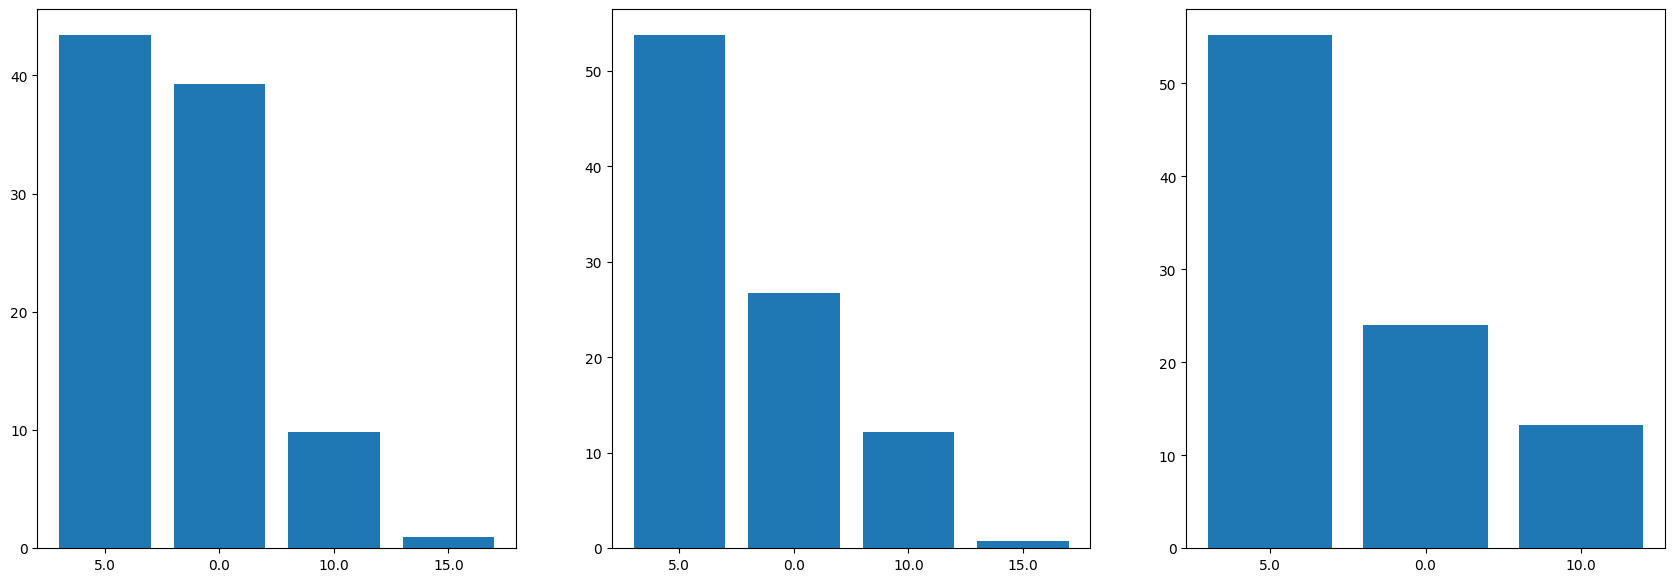

In [29]:
scoreCounts = pd.DataFrame()
scoreCounts["Hygiene"] = establishmentsNonNan["Hygiene"].value_counts()
scoreCounts["Structural"]= establishmentsNonNan["Structural"].value_counts()
scoreCounts["ConfidenceInManagement"] =establishmentsNonNan["ConfidenceInManagement"].value_counts()
scoreCounts["TotalScore"] =establishmentsNonNan["TotalScore"].value_counts()
scoreCounts.index.names = ["score"]
scoreCounts = scoreCounts.reset_index()
scoreCounts['score'] = scoreCounts['score'].astype(str)

totalPlaces = len(establishmentsNonNan)
ScoreDist, (axHygiene,axStructural,axConfidence) = plt.subplots(1,3, figsize=(21 ,7), width_ratios =[1,1,1])
axHygiene.bar(scoreCounts['score'], scoreCounts["Hygiene"]/totalPlaces*100)
axStructural.bar(scoreCounts['score'], scoreCounts["Structural"]/totalPlaces*100)
axConfidence.bar(scoreCounts['score'], scoreCounts["ConfidenceInManagement"]/totalPlaces*100)
scoreCounts

<BarContainer object of 11 artists>

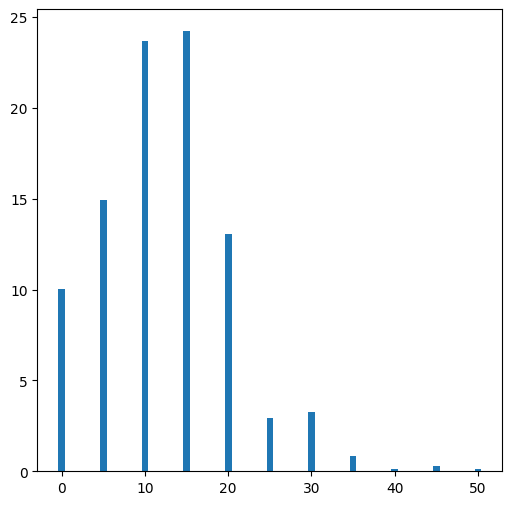

In [30]:
TotalScoreDsit, (axtotal) = plt.subplots(1,1, figsize=(6 ,6), width_ratios =[1])
axtotal.bar(totals['TotalScore'], totals["count"]/totalPlaces*100)

In [31]:
highRiskEstablishments = establishmentsNonNan[establishmentsNonNan["riskColours"] == "red"]
medRiskEstablishments = establishmentsNonNan[establishmentsNonNan["riskColours"] == "yellow"]
lowRiskEstablishments = establishmentsNonNan[establishmentsNonNan["riskColours"] == "green"]

In [32]:
highRiskEstablishments

FHRSID LocalAuthorityBusinessID                        BusinessName   
1020   116551                    45733           Babar Elephant Restaurant  \
1021   112823                     4198    Bare Village Butchers & Deli Ltd   
1022   145296                     8573                      Black Bull Inn   
1024   111987                    41288                              Bodrum   
1026   108330                     3862                      Bowerham Hotel   
1027   109182                    39331           Burgshake Restaurants Ltd   
1030   118561                    47911                      Cinnamon Spice   
1031    93849                     2706                     Clarendon Hotel   
1033   408014                    49483               Curiosity Corner Cafe   
1034   115110                     4424                          Delhicious   
1037   113814                     4281       DR Adams Quality Confectioner   
1038  1316722                    66149                          Eat Indian   
1041   145046                     8493                          Fleece Inn   
1045   971532                    58321      Half Moon Bay Chinese Takeaway   
1054   113177                    42257              Neptune Fish and Chips   
1055    89763                     2413                   Paradise Takeaway   
1057   713190                    53777                       Quay's Chippy   
1059    90053                     2437                         Scrumptious   
1060  1212119                     4260                      Selekt Chicken   
1061   108111                     3843                               Shahi   
1062  1617502                    72604                              SillyZ   
1067   138535                     7383                 The George & Dragon   
1069    91303                    25153                      The Pizza King   
1070   124237                     5275                   The Sands Meadows   
1071   109332                     3944                  The Three Mariners   
1072   113242                    42304                     The Westminster   
1076   963904                    58270  Vista Italian Soul Bar and Kitchen   
1077   109297                     3941                         White Cross   
1078   125669                     5420                        Fortune Star   
1079    97921                    30647                            Go Local   
1080   112646                     4181                       Hornby Stores   
1081  1496738                    70122                    Noel Road Bakery   
1082   109037                     3922              The County Lodge Hotel   
1083  1134903                    61706                           Top Taste   
1084   120046                     4911                   Windmill Takeaway   
1085  1110746                    61472              Brookhouse Post Office   
1086  1746264                    61829               Lancaster Mini Market   
1087  1438723                     1793      Misso Lounge also t/a Tarabeza   
1088  1517633                     4589         Moorgate Off Licence & News   
1089   107531                     3801                     Morrisons Daily   
1090    78338                     1862           Regent Park Pavilion Cafe   
1091   112575                    41747                          Spice Room   
1092  1500146                    43564             Tibicar Service Station   
1093   114353                    43382                         Urban Spice   

                               BusinessType BusinessTypeID      AddressLine1   
1020                Restaurant/Cafe/Canteen              1  Barbar Elephants  \
1021                  Manufacturers/packers           7839              None   
1022                      Pub/bar/nightclub           7843              None   
1024                 Takeaway/sandwich shop           7844              None   
1026                      Pub/bar/nightclub           7843              None   
1027            

In [33]:
establishmentsNonNan["AddressLine3"].value_counts()

AddressLine3
Lancaster                       368
Morecambe                       268
Heysham                          61
Carnforth                        47
Bolton Le Sands                  17
Silverdale                       15
Galgate                          13
Warton                           10
Cockerham                        10
Hest Bank                        10
Glasson Dock                      7
Caton                             6
Lancaster University              6
Bailrigg                          6
Brookhouse                        6
Halton                            6
White Lund Industrial Estate      6
St Nicholas Arcade                5
Middleton                         5
Thurnham                          5
Slyne                             5
Hornby                            5
Capernwray                        4
Overton                           4
Wray                              4
Heaton With Oxcliffe              4
Lune Business Park                3
Priest Hutton  

In [56]:
distance_bins = [0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325]
establishmentsNonNan['Distance'] = pd.to_numeric(establishmentsNonNan['Distance'], errors = 'coerce')
distance_labels = ["0-0.025","0.025-0.05","0.05-0.075","0.1-0.125","0.125-0.15","0.15-0.175","0.175-0.2","0.2-0.225","0.225-0.25","0.25-0.275","0.275-0.3","0.3-0.325"]
RiskCountsAsFunctionOfDistance = pd.DataFrame()
RiskCountsAsFunctionOfDistance["highRiskbins"] = pd.cut(highRiskEstablishments['DistanceToCenter'],12)
RiskCountsAsFunctionOfDistance["medRiskbins"] = pd.cut(medRiskEstablishments['DistanceToCenter'],12)
RiskCountsAsFunctionOfDistance["lowRiskBins"] = pd.cut(lowRiskEstablishments['DistanceToCenter'],12)
RiskCountsAsFunctionOfDistance["highRiskbins"].value_counts()


C:\Users\straf\AppData\Local\Temp\ipykernel_26976\1051796574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  establishmentsNonNan['Distance'] = pd.to_numeric(establishmentsNonNan['Distance'], errors = 'coerce')


bins
(0.00117, 0.0158]    19
(0.0735, 0.0879]      7
(0.0879, 0.102]       6
(0.0446, 0.0591]      4
(0.0591, 0.0735]      3
(0.0158, 0.0302]      2
(0.0302, 0.0446]      1
(0.117, 0.131]        1
(0.16, 0.174]         1
(0.102, 0.117]        0
(0.131, 0.146]        0
(0.146, 0.16]         0
Name: count, dtype: int64